In [2]:
import os

import matplotlib.pyplot as plt
import polars as pl

In [21]:
data_dir = "data"

filenames = os.listdir(data_dir)

dfs = {}

for filename in filenames:
    dfs["_".join(os.path.splitext(filename)[0].split("_")[-2:])] = (pl.read_csv(os.path.join(data_dir, filename), skip_rows_after_header=1)
        .select(
            pl.col("FPS").mean().alias("mean_fps"),
            pl.col("Detection_Time_ms").mean().alias("mean_detection_ms"),
            pl.col("Inference_Time_ms").mean().alias("mean_extraction_ms"),
        )
    )

In [22]:
dfs

{'cpu_n1': shape: (1, 3)
 ┌──────────┬───────────────────┬────────────────────┐
 │ mean_fps ┆ mean_detection_ms ┆ mean_extraction_ms │
 │ ---      ┆ ---               ┆ ---                │
 │ f64      ┆ f64               ┆ f64                │
 ╞══════════╪═══════════════════╪════════════════════╡
 │ 7.051414 ┆ 2.949319          ┆ 130.730812         │
 └──────────┴───────────────────┴────────────────────┘,
 'cpu_n3': shape: (1, 3)
 ┌────────────┬───────────────────┬────────────────────┐
 │ mean_fps   ┆ mean_detection_ms ┆ mean_extraction_ms │
 │ ---        ┆ ---               ┆ ---                │
 │ f64        ┆ f64               ┆ f64                │
 ╞════════════╪═══════════════════╪════════════════════╡
 │ 543.725576 ┆ 1.117932          ┆ 45.322592          │
 └────────────┴───────────────────┴────────────────────┘,
 'gpu_n1': shape: (1, 3)
 ┌──────────┬───────────────────┬────────────────────┐
 │ mean_fps ┆ mean_detection_ms ┆ mean_extraction_ms │
 │ ---      ┆ ---            

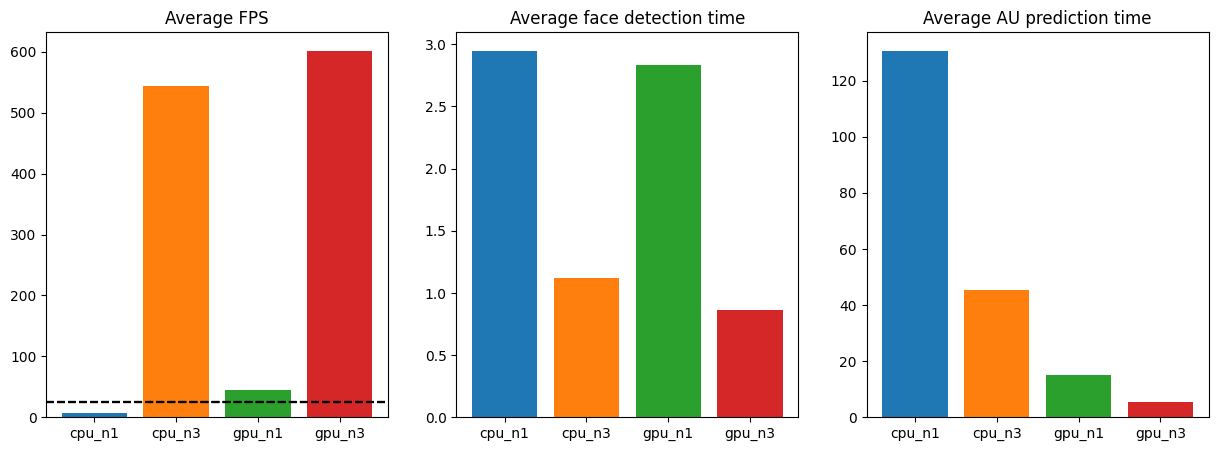

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

for key, val in dfs.items():
    ax1.bar(key, val["mean_fps"])
    ax2.bar(key, val["mean_detection_ms"])
    ax3.bar(key, val["mean_extraction_ms"])

    ax1.set_title("Average FPS")
    ax2.set_title("Average face detection time")
    ax3.set_title("Average AU prediction time")

    ax1.axhline(y=25, color = "black", linestyle="--")

In [37]:
fig.savefig("performance_results.png")